# City Council Voter Turnout Analysis

We examine the change in voter turnout over the various CC election years. <br> Here, we are answering an essential question: <b>How has voter turnout by precinct changed across election year?</b>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading datasets into dataframes
cc2011 = pd.read_csv("2011_CityCouncil_Results_Race_Turnout.csv")
cc2013 = pd.read_csv("2013_CityCouncil_Race_Turnout_Results.csv")
cc2015 = pd.read_csv("2015_city_council.csv")
cc2017 = pd.read_csv("2017_CityCouncil_AtLarge_Turnout_Race.csv")
cc2019 = pd.read_csv("2019 CC Race Turnout.csv")

In [3]:
#checking that these are all the same length
print("Shape of cc2011:", cc2011.shape)
print("Shape of cc2013:", cc2013.shape)
print("Shape of cc2015:", cc2015.shape)
print("Shape of cc2017:", cc2017.shape)
print("Shape of cc2019:", cc2019.shape)

Shape of cc2011: (254, 48)
Shape of cc2013: (254, 46)
Shape of cc2015: (254, 47)
Shape of cc2017: (254, 54)
Shape of cc2019: (253, 51)


In [4]:
cc2011 = cc2011.drop([253])

In [5]:
cc2013 = cc2013.drop([253])
cc2015 = cc2015.drop([253])
cc2017 = cc2017.drop([253])

We will also disregard WP 2213 from each of the datasets since this data is incomplete.

#### Adding voter turnout column to each of the datasets

In [6]:
#beginning with 2011, add turnout column
cc2011["Turnout2011"] = (cc2011["BALLOTS CAST"]/cc2011["Registered Voters"] *100).round(1)
cc2011["Turnout2011"]

0      18.7
1      14.5
2      15.6
3      17.5
4      14.0
       ... 
248    11.7
249     9.7
250    13.7
251    12.7
252    15.5
Name: Turnout2011, Length: 253, dtype: float64

In [7]:
# adding turnout column to 2013
cc2013["Turnout2013"] = (cc2013["BALLOTS CAST"]/cc2013["Registered Voters"] *100).round(1)
cc2013["Turnout2013"]

0      52.0
1      45.4
2      44.0
3      44.1
4      42.6
       ... 
248    31.9
249    26.6
250    35.5
251    33.9
252    32.3
Name: Turnout2013, Length: 253, dtype: float64

In [8]:
# adding turnout column to 2015
cc2015["Turnout2015"] = (cc2015["BALLOTS CAST"]/cc2015["Registered Voters"] *100).round(1)
cc2015["Turnout2015"]

0      13.5
1      11.3
2      13.5
3       9.0
4       7.8
       ... 
248     9.1
249     7.5
250    11.3
251    10.9
252    11.8
Name: Turnout2015, Length: 253, dtype: float64

In [9]:
# 2017 already has a turnout column for some reason
cc2017 = cc2017.rename(columns= {"Turnout":"Turnout2017"})
cc2017["Turnout2017"] = (cc2017["Turnout2017"] *100).round(1)

In [10]:
cc2017["Turnout2017"]

0      35.4
1      28.8
2      29.9
3      28.8
4      28.3
       ... 
248    23.0
249    21.4
250    26.9
251    25.5
252    23.7
Name: Turnout2017, Length: 253, dtype: float64

In [11]:
# 2019
cc2019 = cc2019.rename(columns= {"Turnout":"Turnout2019"})
cc2019

,Ward,Precinct_x,Winner,2nd,3rd,4th,Flaherty,St. Guillen,Wu,Mejia,...,Asian Percentage,Native Hawaiian/Pacific Islander Percentage,Other Race Percentage,Two or more races Percentage,Hispanic Percentage,White Percentage,Turnout2019,White plurality (Y/N),Asian plurality (Y/N),Hispanic plurality (Y/N)
0,1,1,Wu,Essaibi-George,Halbert,Flaherty,119,92,180,93,...,2.853815,0.232964,10.075713,3.494467,29.295282,79.732091,0.104834,Y,N,N
1,1,2,Wu,Essaibi-George,Flaherty,Mejia,72,53,86,55,...,2.028006,0.000000,16.948334,4.538870,51.810719,73.394495,0.041526,Y,N,N
2,1,3,Wu,Essaibi-George,Flaherty,Mejia,173,144,207,167,...,7.172067,0.000000,15.539478,5.662158,41.333753,62.566845,0.065115,Y,N,N
3,1,4,Wu,Essaibi-George,St. Guillen,Mejia,51,57,79,54,...,2.016985,0.053079,29.458599,6.581741,63.853503,58.227176,0.041932,N,N,Y
4,1,5,Wu,Essaibi-George,Flaherty,St. Guillen,65,57,78,50,...,2.631579,0.173130,31.024931,5.297784,57.617729,57.444598,0.027008,N,N,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,22,8,Wu,Flaherty,Essaibi-George,Murphy,134,64,145,43,...,17.288136,0.000000,1.259080,1.791768,5.230024,76.658596,0.070218,Y,N,N
249,22,9,Essaibi-George,Wu,Flaherty,St. Guillen,111,86,161,62,...,15.807730,0.099108,1.635282,2.973241,4.905847,77.502478,0.079782,Y,N,N
250,22,10,Wu,Essaibi-George,Flaherty,St. Guillen,144,125,243,98,...,10.237510,0.000000,2.989353,1.801802,8.476658,81.244881,0.099509,Y,N,N
251,22,11,Wu,Flaherty,Essaibi-George,Murphy,151,69,157,64,...,11.787072,0.000000,2.205323,3.117871,8.288973,77.490494,0.119392,Y,N,N


In [12]:
cc2019["Turnout2019"] = (cc2019["Turnout2019"] *100).round(1)
cc2019["Turnout2019"]

0      10.5
1       4.2
2       6.5
3       4.2
4       2.7
       ... 
248     7.0
249     8.0
250    10.0
251    11.9
252     9.4
Name: Turnout2019, Length: 253, dtype: float64

In [76]:
cc2019

,Ward,Precinct_x,Winner,2nd,3rd,4th,Flaherty,St. Guillen,Wu,Mejia,...,Other Race Percentage,Two or more races Percentage,Hispanic Percentage,White Percentage,Turnout2019,White plurality (Y/N),Asian plurality (Y/N),Hispanic plurality (Y/N),Sum of Ballots Cast 2019,Share of Voters 2019
0,1,1,Wu,Essaibi-George,Halbert,Flaherty,119,92,180,93,...,10.075713,3.494467,29.295282,79.732091,10.5,Y,N,N,200764,0.44679
1,1,2,Wu,Essaibi-George,Flaherty,Mejia,72,53,86,55,...,16.948334,4.538870,51.810719,73.394495,4.2,Y,N,N,200764,0.21468
2,1,3,Wu,Essaibi-George,Flaherty,Mejia,173,144,207,167,...,15.539478,5.662158,41.333753,62.566845,6.5,Y,N,N,200764,0.55388
3,1,4,Wu,Essaibi-George,St. Guillen,Mejia,51,57,79,54,...,29.458599,6.581741,63.853503,58.227176,4.2,N,N,Y,200764,0.19476
4,1,5,Wu,Essaibi-George,Flaherty,St. Guillen,65,57,78,50,...,31.024931,5.297784,57.617729,57.444598,2.7,N,N,Y,200764,0.20920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,22,8,Wu,Flaherty,Essaibi-George,Murphy,134,64,145,43,...,1.259080,1.791768,5.230024,76.658596,7.0,Y,N,N,200764,0.33821
249,22,9,Essaibi-George,Wu,Flaherty,St. Guillen,111,86,161,62,...,1.635282,2.973241,4.905847,77.502478,8.0,Y,N,N,200764,0.37208
250,22,10,Wu,Essaibi-George,Flaherty,St. Guillen,144,125,243,98,...,2.989353,1.801802,8.476658,81.244881,10.0,Y,N,N,200764,0.50906
251,22,11,Wu,Flaherty,Essaibi-George,Murphy,151,69,157,64,...,2.205323,3.117871,8.288973,77.490494,11.9,Y,N,N,200764,0.37058


#### Creating a DataFrame with each of the voter turnouts

In [13]:
# creating a new dataframe with turnout data
temp1 = cc2011[["WP", "Turnout2011"]]
turnouts = temp1.join(cc2013[["Turnout2013"]]).join(cc2015[["Turnout2015"]]).join(cc2017[["Turnout2017"]]).join(cc2019[["Turnout2019"]])
turnouts

,WP,Turnout2011,Turnout2013,Turnout2015,Turnout2017,Turnout2019
0,101,18.7,52.0,13.5,35.4,10.5
1,102,14.5,45.4,11.3,28.8,4.2
2,103,15.6,44.0,13.5,29.9,6.5
3,104,17.5,44.1,9.0,28.8,4.2
4,105,14.0,42.6,7.8,28.3,2.7
...,...,...,...,...,...,...
248,2208,11.7,31.9,9.1,23.0,7.0
249,2209,9.7,26.6,7.5,21.4,8.0
250,2210,13.7,35.5,11.3,26.9,10.0
251,2211,12.7,33.9,10.9,25.5,11.9


#### Creating a DataFrame of percent of total vote for each year

### Visualizing the voter turnout across election year for each precinct.

<AxesSubplot:xlabel='WP'>

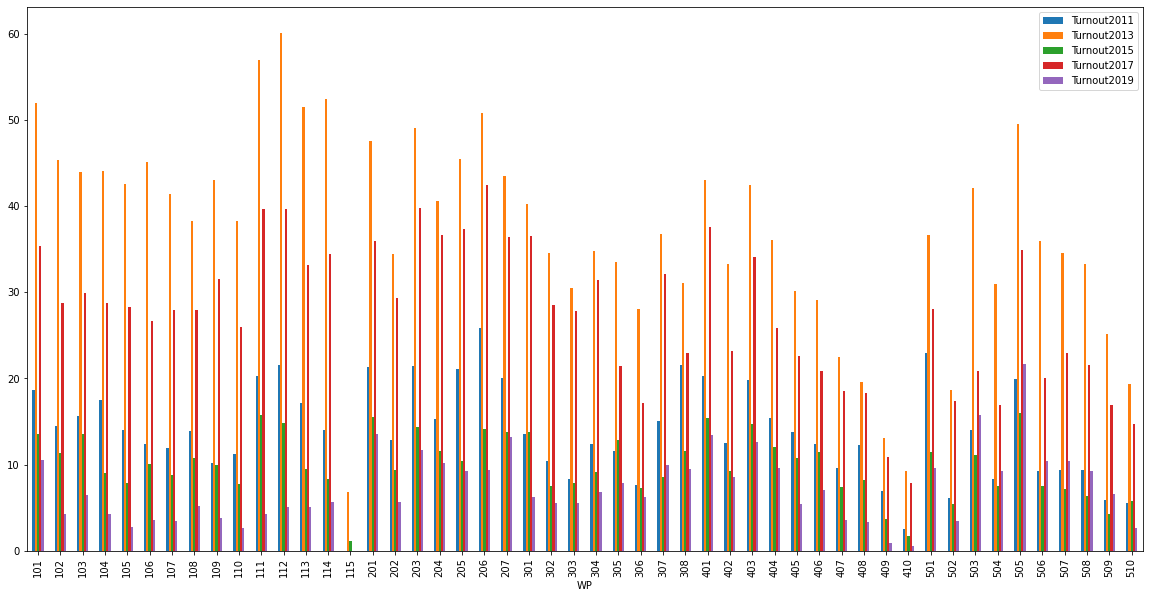

In [14]:
# visualizing our datasets 50 WPs at a time
turnouts[:50].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

<AxesSubplot:xlabel='WP'>

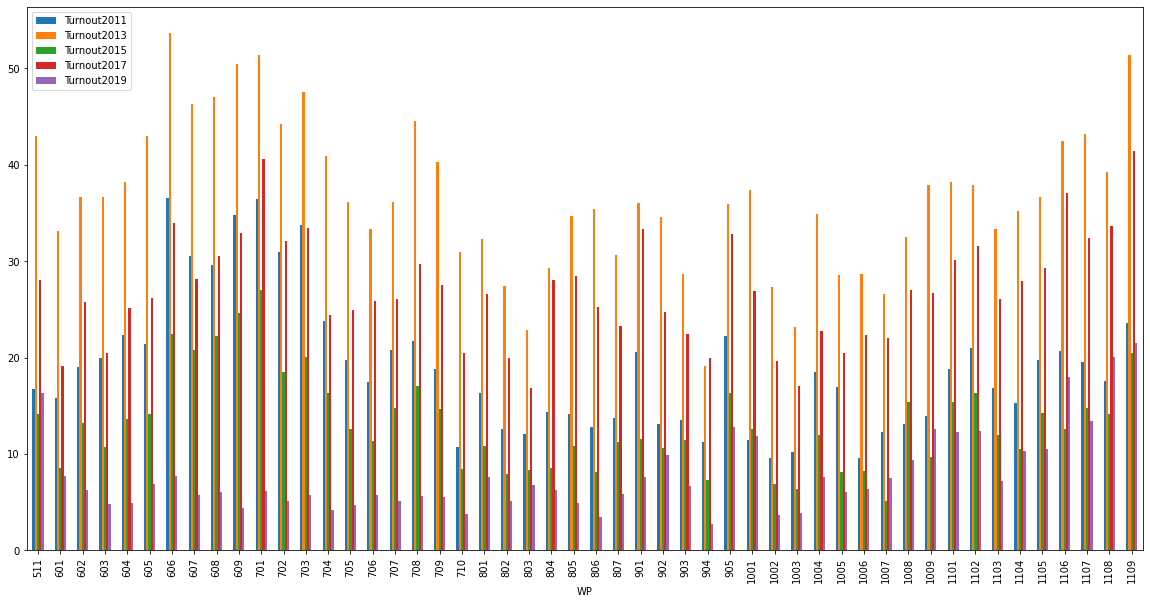

In [15]:
turnouts[50:100].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

<AxesSubplot:xlabel='WP'>

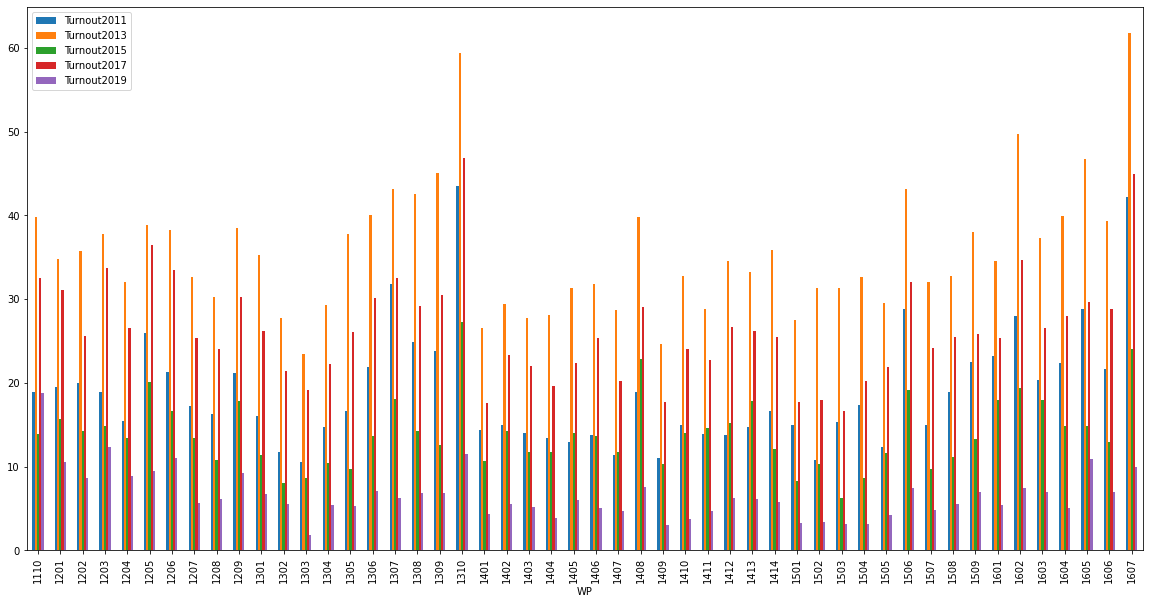

In [16]:
turnouts[100:150].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

<AxesSubplot:xlabel='WP'>

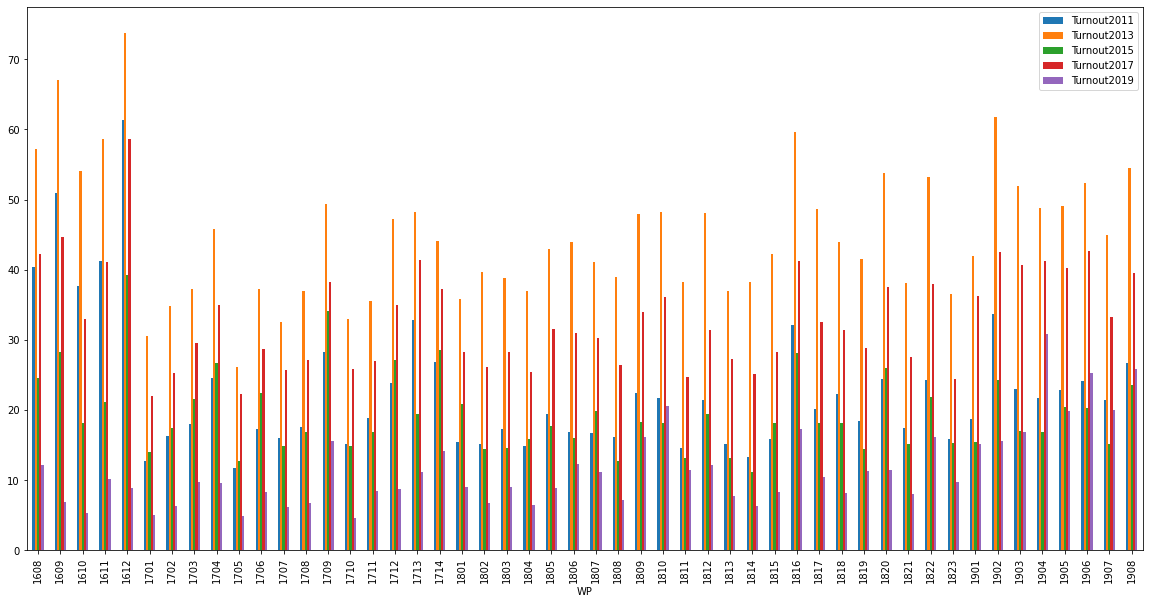

In [17]:
turnouts[150:200].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

<AxesSubplot:xlabel='WP'>

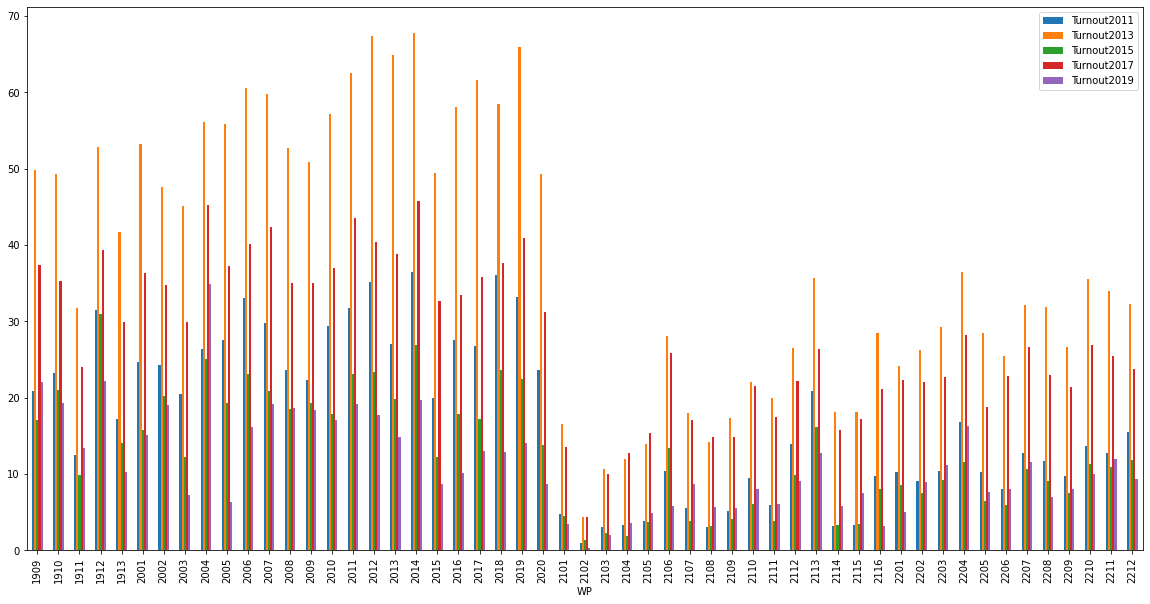

In [18]:
turnouts[200:].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

The 2013 race seems to have the highest voter turnout. Why is this?

#### Calculating the mean voter turnout for each election year

In [19]:
print("Mean voter turnout 2011:", turnouts["Turnout2011"].mean().round(1), "%")
print("Mean voter turnout 2013:", turnouts["Turnout2013"].mean().round(1), "%")
print("Mean voter turnout 2015:", turnouts["Turnout2015"].mean().round(1), "%")
print("Mean voter turnout 2017:", turnouts["Turnout2017"].mean().round(1), "%")
print("Mean voter turnout 2019:", turnouts["Turnout2019"].mean().round(1), "%")

Mean voter turnout 2011: 18.3 %
Mean voter turnout 2013: 38.5 %
Mean voter turnout 2015: 13.9 %
Mean voter turnout 2017: 28.3 %
Mean voter turnout 2019: 9.0 %


As we can see, 2013 has the highest average voter turnout.

#### Calculating the median voter turnout for each election year

In [20]:
print("Median voter turnout 2011:", turnouts["Turnout2011"].median().round(1), "%")
print("Median voter turnout 2013:", turnouts["Turnout2013"].median(), "%")
print("Median voter turnout 2015:", turnouts["Turnout2015"].median(), "%")
print("Median voter turnout 2017:", turnouts["Turnout2017"].median(), "%")
print("Median voter turnout 2017:", turnouts["Turnout2019"].median(), "%")

Median voter turnout 2011: 17.0 %
Median voter turnout 2013: 37.3 %
Median voter turnout 2015: 13.5 %
Median voter turnout 2017: 27.8 %
Median voter turnout 2017: 7.6 %


Again, 2013 is the highest.

#### Calculating average change over time

In [21]:
import math
turnouts["Diff11_13"] = turnouts["Turnout2011"] - turnouts["Turnout2013"]
turnouts["Diff11_13"] = turnouts["Diff11_13"].abs()
turnouts["Diff13_15"] = turnouts["Turnout2013"] - turnouts["Turnout2015"]
turnouts["Diff13_15"] = turnouts["Diff13_15"].abs()
turnouts["Diff15_17"] = turnouts["Turnout2015"] - turnouts["Turnout2017"]
turnouts["Diff15_17"] = turnouts["Diff15_17"].abs()
turnouts["Diff17_19"] = turnouts["Turnout2017"] - turnouts["Turnout2019"]
turnouts["Diff17_19"] = turnouts["Diff17_19"].abs()
turnouts["SumChange"] = turnouts["Diff11_13"] + turnouts["Diff13_15"] + turnouts["Diff15_17"] + turnouts["Diff17_19"]
turnouts["AvgChange"] = (turnouts["SumChange"] / 4.0).round(1)
turnouts

,WP,Turnout2011,Turnout2013,Turnout2015,Turnout2017,Turnout2019,Diff11_13,Diff13_15,Diff15_17,Diff17_19,SumChange,AvgChange
0,101,18.7,52.0,13.5,35.4,10.5,33.3,38.5,21.9,24.9,118.6,29.6
1,102,14.5,45.4,11.3,28.8,4.2,30.9,34.1,17.5,24.6,107.1,26.8
2,103,15.6,44.0,13.5,29.9,6.5,28.4,30.5,16.4,23.4,98.7,24.7
3,104,17.5,44.1,9.0,28.8,4.2,26.6,35.1,19.8,24.6,106.1,26.5
4,105,14.0,42.6,7.8,28.3,2.7,28.6,34.8,20.5,25.6,109.5,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...
248,2208,11.7,31.9,9.1,23.0,7.0,20.2,22.8,13.9,16.0,72.9,18.2
249,2209,9.7,26.6,7.5,21.4,8.0,16.9,19.1,13.9,13.4,63.3,15.8
250,2210,13.7,35.5,11.3,26.9,10.0,21.8,24.2,15.6,16.9,78.5,19.6
251,2211,12.7,33.9,10.9,25.5,11.9,21.2,23.0,14.6,13.6,72.4,18.1


### Finding the Top 20 Precincts with the greatest average change in voter turnout.

In [22]:
#finding the top 20 precincts with the greatest average change
top_change = turnouts.sort_values(by=['AvgChange'], ascending=False)
top_change

,WP,Turnout2011,Turnout2013,Turnout2015,Turnout2017,Turnout2019,Diff11_13,Diff13_15,Diff15_17,Diff17_19,SumChange,AvgChange
11,112,21.5,60.1,14.8,39.7,5.1,38.6,45.3,24.9,34.6,143.4,35.8
10,111,20.3,57.0,15.7,39.7,4.3,36.7,41.3,24.0,35.4,137.4,34.4
13,114,14.0,52.4,8.3,34.4,5.7,38.4,44.1,26.1,28.7,137.3,34.3
12,113,17.1,51.5,9.5,33.2,5.1,34.4,42.0,23.7,28.1,128.2,32.1
217,2013,27.0,64.9,19.8,38.8,14.9,37.9,45.1,19.0,23.9,125.9,31.5
...,...,...,...,...,...,...,...,...,...,...,...,...
38,409,6.9,13.1,3.7,10.9,0.9,6.2,9.4,7.2,10.0,32.8,8.2
227,2103,3.1,10.6,2.3,10.0,2.0,7.5,8.3,7.7,8.0,31.5,7.9
39,410,2.5,9.2,1.7,7.8,0.6,6.7,7.5,6.1,7.2,27.5,6.9
14,115,0.0,6.8,1.1,0.0,0.0,6.8,5.7,1.1,0.0,13.6,3.4


<AxesSubplot:xlabel='WP'>

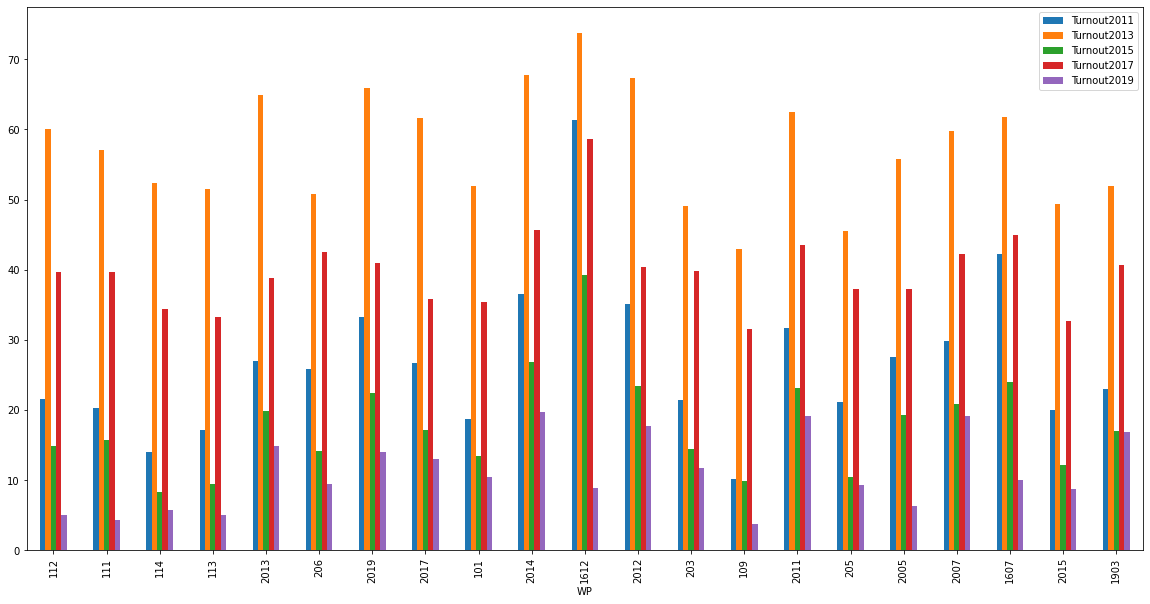

In [23]:
#visualizing these top 20
top_change[:21].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

### Preliminary Analysis of these Top 20 Precincts

In [24]:
top_change[:21].drop(columns=['Diff11_13', 'Diff13_15', 'Diff15_17', 'Diff17_19', 'SumChange'])

,WP,Turnout2011,Turnout2013,Turnout2015,Turnout2017,Turnout2019,AvgChange
11,112,21.5,60.1,14.8,39.7,5.1,35.8
10,111,20.3,57.0,15.7,39.7,4.3,34.4
13,114,14.0,52.4,8.3,34.4,5.7,34.3
12,113,17.1,51.5,9.5,33.2,5.1,32.1
217,2013,27.0,64.9,19.8,38.8,14.9,31.5
20,206,25.8,50.8,14.1,42.5,9.4,30.8
223,2019,33.2,65.9,22.4,40.9,14.0,30.4
221,2017,26.7,61.6,17.2,35.8,13.0,30.2
0,101,18.7,52.0,13.5,35.4,10.5,29.6
218,2014,36.5,67.8,26.9,45.7,19.7,29.2


In [25]:
top20 = cc2011.iloc[[11, 10, 13, 12, 217, 20, 223, 221, 0, 218, 154, 216, 17, 8, 215, 19, 209, 211, 149, 219, 194]]

In [26]:
top20["Black Percentage"] = top20["Black Percentage"].round(1)
top20["Hispanic Percentage"] = top20["Hispanic Percentage"].round(1)
top20["Asian Percentage"] = top20["Asian Percentage"].round(1)

<ipython-input-26-8733704988aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20["Black Percentage"] = top20["Black Percentage"].round(1)
<ipython-input-26-8733704988aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20["Hispanic Percentage"] = top20["Hispanic Percentage"].round(1)
<ipython-input-26-8733704988aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [27]:
top20[["WP", "Black Percentage", "Hispanic Percentage", "Asian Percentage"]]

,WP,Black Percentage,Hispanic Percentage,Asian Percentage
11,112,1.8,26.0,2.7
10,111,2.9,33.9,3.2
13,114,2.6,17.7,4.5
12,113,8.6,41.9,3.8
217,2013,2.0,3.0,5.9
20,206,1.8,4.1,7.1
223,2019,1.1,3.9,5.4
221,2017,2.9,3.6,4.4
0,101,3.2,29.3,2.9
218,2014,2.0,3.1,3.9


#### Breakdown by racial demographics:

<AxesSubplot:xlabel='WP'>

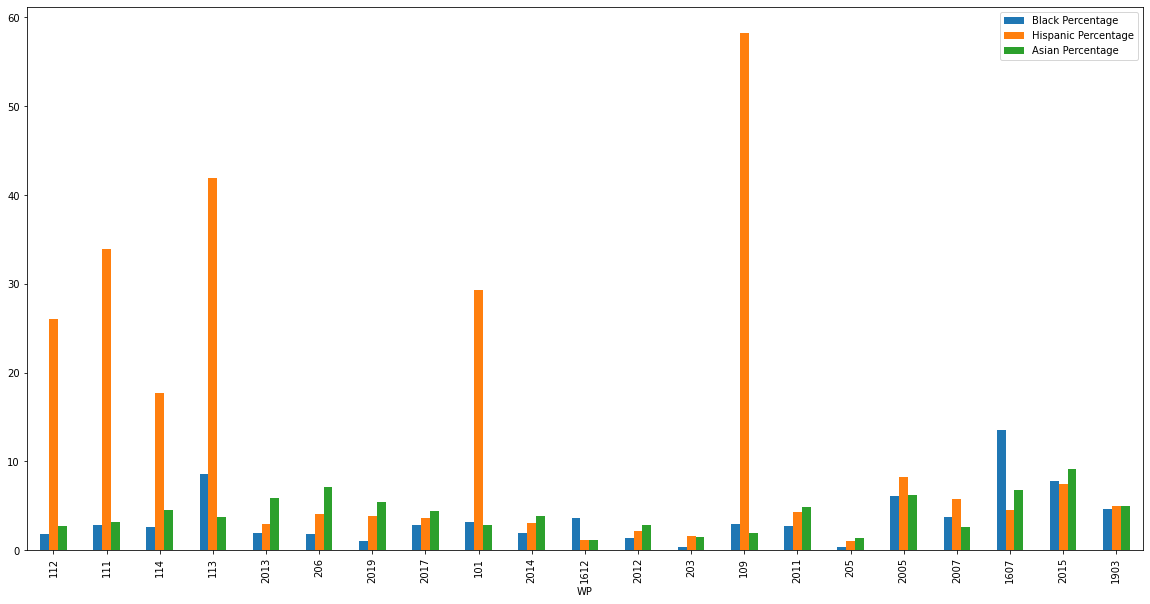

In [28]:
top20.plot(x="WP", y=["Black Percentage", "Hispanic Percentage", "Asian Percentage"], kind="bar", figsize = (20,10))

In [29]:
top_change.to_csv("TurnoutVolatility.csv", index = False)

This chart seems to indicate that the most "volatile" precincts in terms of voter turnout are either not dense in minority populations or have a significant Hispanic population. As we can see, a total of 6 precincts with a significant Hispanic population are in the Top 20 of this list.

## We will now look at which precincts had the greatest change in share of total votes

Here, we use cc2011, cc2013, cc2015, and cc2017.

In [30]:
sum_reg_11 = cc2011["BALLOTS CAST"].sum()
reg_11_lst = [sum_reg_11] * 253
cc2011["Sum of Ballots Cast 2011"] = reg_11_lst

In [31]:
cc2011["Share of Voters 2011"] = (cc2011["BALLOTS CAST"]/cc2011["Sum of Ballots Cast 2011"] * 100).round(5)

In [32]:
cc2011["Share of Voters 2011"]

0      0.33080
1      0.18608
2      0.42941
3      0.15268
4      0.21311
        ...   
248    0.23538
249    0.20039
250    0.32762
251    0.20357
252    0.26242
Name: Share of Voters 2011, Length: 253, dtype: float64

In [33]:
sum_reg_13 = cc2013["BALLOTS CAST"].sum()
reg_13_lst = [sum_reg_13] * 253
cc2013["Sum of Ballots Cast 2013"] = reg_13_lst

In [34]:
cc2013["Share of Voters 2013"] = (cc2013["BALLOTS CAST"]/cc2013["Sum of Ballots Cast 2013"] * 100).round(5)

In [35]:
cc2013["Share of Voters 2013"]

0      0.45452
1      0.30537
2      0.61074
3      0.20429
4      0.32304
        ...   
248    0.28841
249    0.24105
250    0.38454
251    0.25518
252    0.26155
Name: Share of Voters 2013, Length: 253, dtype: float64

In [36]:
sum_reg_15 = cc2015["BALLOTS CAST"].sum()
reg_15_lst = [sum_reg_15] * 253
cc2015["Sum of Ballots Cast 2015"] = reg_15_lst

In [37]:
cc2015["Share of Voters 2015"] = (cc2015["BALLOTS CAST"]/cc2015["Sum of Ballots Cast 2015"] * 100).round(5)

In [38]:
cc2015["Share of Voters 2015"]

0      0.34332
1      0.21112
2      0.55050
3      0.11839
4      0.17166
        ...   
248    0.22691
249    0.18350
250    0.33543
251    0.22691
252    0.27229
Name: Share of Voters 2015, Length: 253, dtype: float64

In [39]:
sum_reg_17 = cc2017["BALLOTS CAST"].sum()
reg_17_lst = [sum_reg_17] * 253
cc2017["Sum of Ballots Cast 2017"] = reg_17_lst

In [40]:
cc2017["Share of Voters 2017"] = (cc2017["BALLOTS CAST"]/cc2017["Sum of Ballots Cast 2017"] * 100).round(5)

In [42]:
sum_reg_19 = cc2019["Total Votes Cast"].sum()
reg_19_lst = [sum_reg_19] * 253
cc2019["Sum of Ballots Cast 2019"] = reg_19_lst

In [44]:
cc2019["Share of Voters 2019"] = (cc2019["Total Votes Cast"]/cc2019["Sum of Ballots Cast 2019"] * 100).round(5)

### Determining the top 20 precincts with the greatest change in share of turnout over time

In [45]:
temp2 = cc2011[["WP"]]
shareturnouts = temp2.join(cc2011[["Share of Voters 2011"]]).join(cc2013[["Share of Voters 2013"]]).join(cc2015[["Share of Voters 2015"]]).join(cc2017[["Share of Voters 2017"]]).join(cc2019[["Share of Voters 2019"]])
shareturnouts

,WP,Share of Voters 2011,Share of Voters 2013,Share of Voters 2015,Share of Voters 2017,Share of Voters 2019
0,101,0.33080,0.45452,0.34332,0.45573,0.44679
1,102,0.18608,0.30537,0.21112,0.27436,0.21468
2,103,0.42941,0.61074,0.55050,0.65459,0.55388
3,104,0.15268,0.20429,0.11839,0.21175,0.19476
4,105,0.21311,0.32304,0.17166,0.32684,0.20920
...,...,...,...,...,...,...
248,2208,0.23538,0.28841,0.22691,0.27160,0.33821
249,2209,0.20039,0.24105,0.18350,0.26147,0.37208
250,2210,0.32762,0.38454,0.33543,0.35998,0.50906
251,2211,0.20357,0.25518,0.22691,0.24398,0.37058


In [46]:
import math
shareturnouts["Diff11_13"] = shareturnouts["Share of Voters 2011"] - shareturnouts["Share of Voters 2013"]
shareturnouts["Diff11_13"] = shareturnouts["Diff11_13"].abs()

shareturnouts["Diff13_15"] = shareturnouts["Share of Voters 2013"] - shareturnouts["Share of Voters 2015"]
shareturnouts["Diff13_15"] = shareturnouts["Diff13_15"].abs()

shareturnouts["Diff15_17"] = shareturnouts["Share of Voters 2015"] - shareturnouts["Share of Voters 2017"]
shareturnouts["Diff15_17"] = shareturnouts["Diff15_17"].abs()

shareturnouts["Diff17_19"] = shareturnouts["Share of Voters 2019"] - shareturnouts["Share of Voters 2019"]
shareturnouts["Diff17_19"] = shareturnouts["Diff17_19"].abs()

shareturnouts["SumChange"] = shareturnouts["Diff11_13"] + shareturnouts["Diff13_15"] + shareturnouts["Diff15_17"] + shareturnouts["Diff17_19"]
shareturnouts["AvgChange"] = (shareturnouts["SumChange"] / 4.0).round(5)
shareturnouts

,WP,Share of Voters 2011,Share of Voters 2013,Share of Voters 2015,Share of Voters 2017,Share of Voters 2019,Diff11_13,Diff13_15,Diff15_17,Diff17_19,SumChange,AvgChange
0,101,0.33080,0.45452,0.34332,0.45573,0.44679,0.12372,0.11120,0.11241,0.0,0.34733,0.08683
1,102,0.18608,0.30537,0.21112,0.27436,0.21468,0.11929,0.09425,0.06324,0.0,0.27678,0.06919
2,103,0.42941,0.61074,0.55050,0.65459,0.55388,0.18133,0.06024,0.10409,0.0,0.34566,0.08641
3,104,0.15268,0.20429,0.11839,0.21175,0.19476,0.05161,0.08590,0.09336,0.0,0.23087,0.05772
4,105,0.21311,0.32304,0.17166,0.32684,0.20920,0.10993,0.15138,0.15518,0.0,0.41649,0.10412
...,...,...,...,...,...,...,...,...,...,...,...,...
248,2208,0.23538,0.28841,0.22691,0.27160,0.33821,0.05303,0.06150,0.04469,0.0,0.15922,0.03980
249,2209,0.20039,0.24105,0.18350,0.26147,0.37208,0.04066,0.05755,0.07797,0.0,0.17618,0.04404
250,2210,0.32762,0.38454,0.33543,0.35998,0.50906,0.05692,0.04911,0.02455,0.0,0.13058,0.03264
251,2211,0.20357,0.25518,0.22691,0.24398,0.37058,0.05161,0.02827,0.01707,0.0,0.09695,0.02424


In [49]:
#finding the top 20 precincts with the greatest average change
top_share_change = shareturnouts.sort_values(by=['AvgChange'], ascending=False)
top_share_change[:20]

,WP,Share of Voters 2011,Share of Voters 2013,Share of Voters 2015,Share of Voters 2017,Share of Voters 2019,Diff11_13,Diff13_15,Diff15_17,Diff17_19,SumChange,AvgChange
154,1612,1.20712,0.64750,0.96486,0.64263,0.72872,0.55962,0.31736,0.32223,0.0,1.19921,0.29980
28,307,0.88745,0.98822,0.62943,1.12690,0.82983,0.10077,0.35879,0.49747,0.0,0.95703,0.23926
168,1714,0.42305,0.33577,0.76557,0.44468,0.45974,0.08728,0.42980,0.32089,0.0,0.83797,0.20949
158,1704,0.66479,0.58388,0.95499,0.58646,0.51404,0.08091,0.37111,0.36853,0.0,0.82055,0.20514
119,1310,1.11010,0.69274,0.89580,0.70799,0.70979,0.41736,0.20306,0.18781,0.0,0.80823,0.20206
151,1609,1.10533,0.67860,0.82871,0.61685,0.60071,0.42673,0.15011,0.21186,0.0,0.78870,0.19717
12,113,0.43259,0.65104,0.34727,0.58646,0.37009,0.21845,0.30377,0.23919,0.0,0.76141,0.19035
48,509,0.26401,0.50613,0.22691,0.41430,0.54591,0.24212,0.27922,0.18739,0.0,0.70873,0.17718
27,306,0.43259,0.78181,0.56037,0.67485,0.69236,0.34922,0.22144,0.11448,0.0,0.68514,0.17128
40,501,1.44886,1.14656,0.98064,1.16556,1.19892,0.30230,0.16592,0.18492,0.0,0.65314,0.16329


<AxesSubplot:xlabel='WP'>

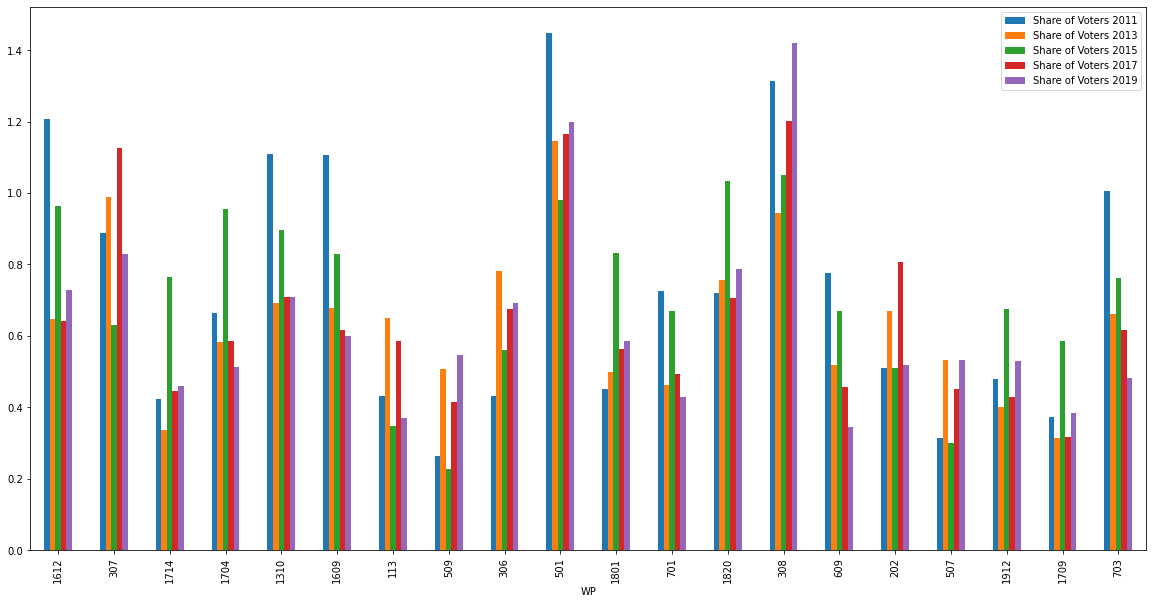

In [50]:
#visualizing these top 20
top_share_change[:20].plot(x="WP", y=["Share of Voters 2011", "Share of Voters 2013", "Share of Voters 2015", "Share of Voters 2017", "Share of Voters 2019"], kind="bar", figsize = (20,10))


In [52]:
sharetop20 = cc2011.iloc[[154, 28, 168, 158, 119, 151, 12, 48, 27, 40, 169, 60, 188, 29, 59, 16, 46, 203, 163, 62]]

In [53]:
sharetop20["Black Percentage"] = sharetop20["Black Percentage"].round(1)
sharetop20["Hispanic Percentage"] = sharetop20["Hispanic Percentage"].round(1)
sharetop20["Asian Percentage"] = sharetop20["Asian Percentage"].round(1)

<ipython-input-53-47e40ad1e5f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharetop20["Black Percentage"] = sharetop20["Black Percentage"].round(1)
<ipython-input-53-47e40ad1e5f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharetop20["Hispanic Percentage"] = sharetop20["Hispanic Percentage"].round(1)
<ipython-input-53-47e40ad1e5f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [54]:
sharetop20[["WP","Black Percentage", "Hispanic Percentage", "Asian Percentage"]]

,WP,Black Percentage,Hispanic Percentage,Asian Percentage
154,1612,3.6,1.2,1.2
28,307,5.9,6.6,15.9
168,1714,58.1,7.5,5.0
158,1704,58.7,6.9,7.6
119,1310,6.3,4.9,11.2
151,1609,3.3,2.7,3.1
12,113,8.6,41.9,3.8
48,509,2.2,6.4,12.5
27,306,4.6,5.3,8.5
40,501,4.6,4.5,29.7


#### Breakdown by racial demographics

<AxesSubplot:xlabel='WP'>

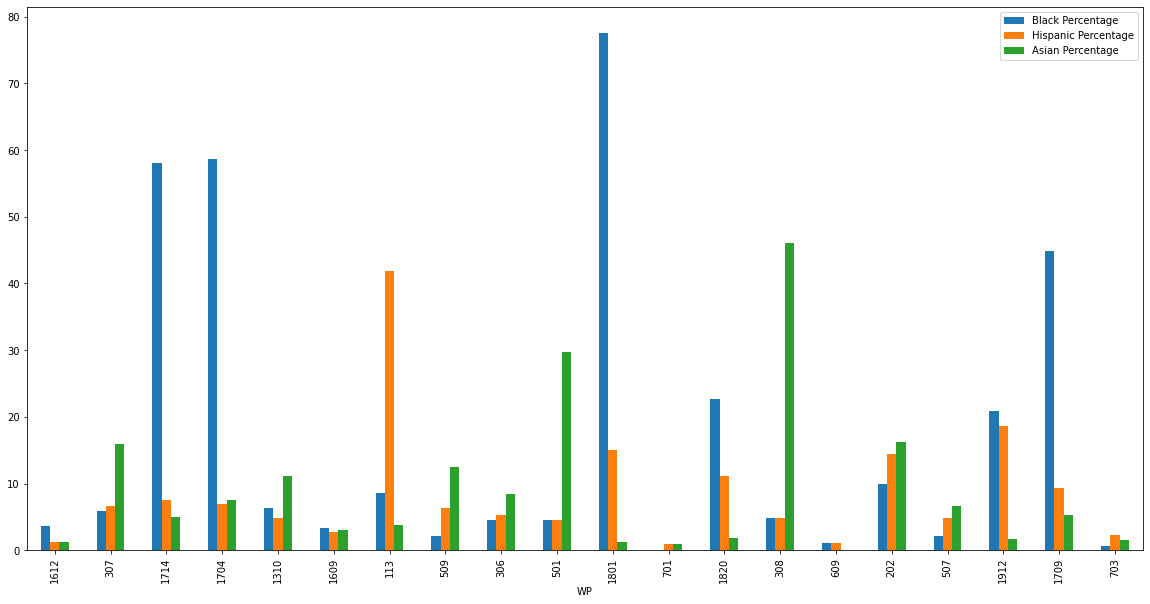

In [55]:
sharetop20.plot(x="WP", y=["Black Percentage", "Hispanic Percentage", "Asian Percentage"], kind="bar", figsize = (20,10))

Here, we see the demographic breakdown of those districts which experienced the greatest AVERAGE change in share of total percentage of votes for each city council election. Here, we see that precints with a significant Black population seem to experience a significant average change.

In [56]:
top_share_change[:21].drop(columns=['Diff11_13', 'Diff13_15', 'Diff15_17', 'Diff17_19', 'SumChange'])

,WP,Share of Voters 2011,Share of Voters 2013,Share of Voters 2015,Share of Voters 2017,Share of Voters 2019,AvgChange
154,1612,1.20712,0.64750,0.96486,0.64263,0.72872,0.29980
28,307,0.88745,0.98822,0.62943,1.12690,0.82983,0.23926
168,1714,0.42305,0.33577,0.76557,0.44468,0.45974,0.20949
158,1704,0.66479,0.58388,0.95499,0.58646,0.51404,0.20514
119,1310,1.11010,0.69274,0.89580,0.70799,0.70979,0.20206
151,1609,1.10533,0.67860,0.82871,0.61685,0.60071,0.19717
12,113,0.43259,0.65104,0.34727,0.58646,0.37009,0.19035
48,509,0.26401,0.50613,0.22691,0.41430,0.54591,0.17718
27,306,0.43259,0.78181,0.56037,0.67485,0.69236,0.17128
40,501,1.44886,1.14656,0.98064,1.16556,1.19892,0.16329


In [57]:
top_share_change.to_csv("TopShareChange.csv")

## Deeper look: Wards 13, 15, and 16

In [68]:
def Dorcester_precincts(df):
    columns = df.columns.to_list()
    index = columns.index("WP")
    
    data_array = df.to_numpy()
    
    rows = []
    for i in range(np.shape(data_array)[0]):
        current_p = str(int(data_array[i, index]))
        if len(current_p) == 4:
            if current_p[0:2] == '13' or current_p[0:2] == '15' or current_p[0:2] == '16' or current_p[0:2] == '17':
                rows.append(data_array[i].tolist())
    
    Dorcester_df = pd.DataFrame(np.asarray(rows), columns = df.columns)
    Dorcester_df["WP"] = Dorcester_df["WP"].astype('Int64')
    return Dorcester_df

In [69]:
# shortening our volatility dataframe
top_change_d3 = Dorcester_precincts(top_change)

In [73]:
top_change_d3[:10].drop(columns=['Diff11_13', 'Diff13_15', 'Diff15_17', 'Diff17_19', 'SumChange'])

,WP,Turnout2011,Turnout2013,Turnout2015,Turnout2017,Turnout2019,AvgChange
0,1612,61.3,73.8,39.3,58.6,8.9,29.0
1,1607,42.2,61.8,24.0,44.9,10.0,28.3
2,1609,51.0,67.0,28.2,44.7,6.9,27.3
3,1611,41.2,58.7,21.1,41.1,10.2,26.5
4,1310,43.5,59.4,27.3,46.8,11.5,25.7
5,1608,40.4,57.2,24.6,42.3,12.1,24.3
6,1713,32.8,48.2,19.5,41.4,11.1,24.1
7,1309,23.8,45.1,12.6,30.5,6.9,23.8
8,1610,37.7,54.1,18.2,33.0,5.3,23.7
9,1602,28.0,49.7,19.4,34.7,7.5,23.6


<AxesSubplot:xlabel='WP'>

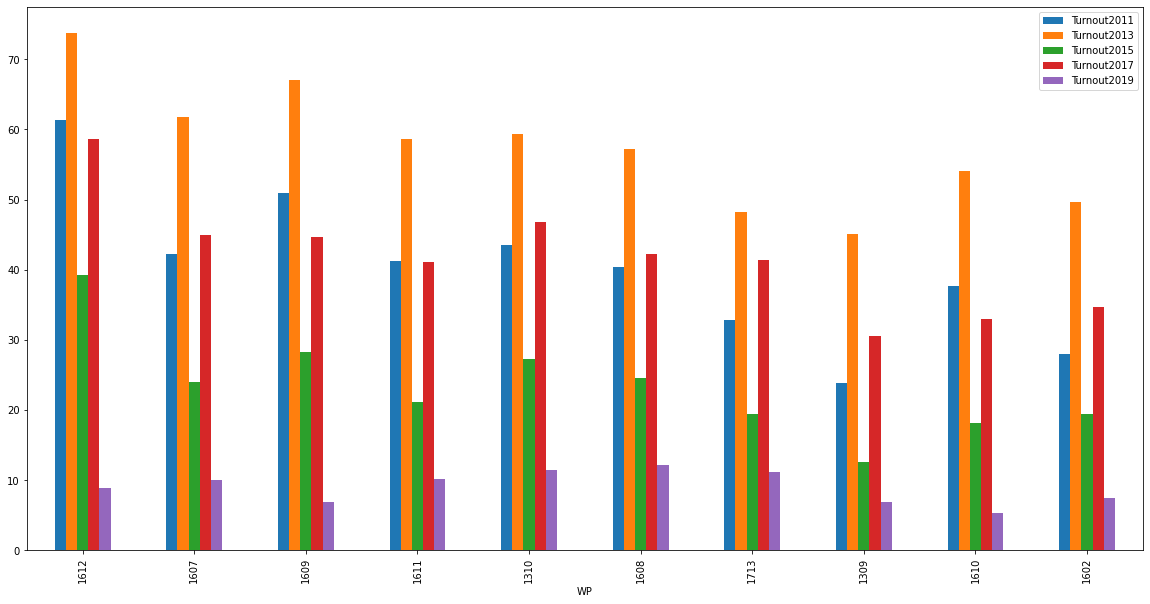

In [75]:
#visualizing these top 10
top_change_d3[:10].plot(x="WP", y=["Turnout2011", "Turnout2013", "Turnout2015", "Turnout2017", "Turnout2019"], kind="bar", figsize = (20,10))

In [77]:
top10d3 = cc2011.iloc[[154, 149, 151, 153, 119, 150, 167, 118, 152, 144]]

<AxesSubplot:xlabel='WP'>

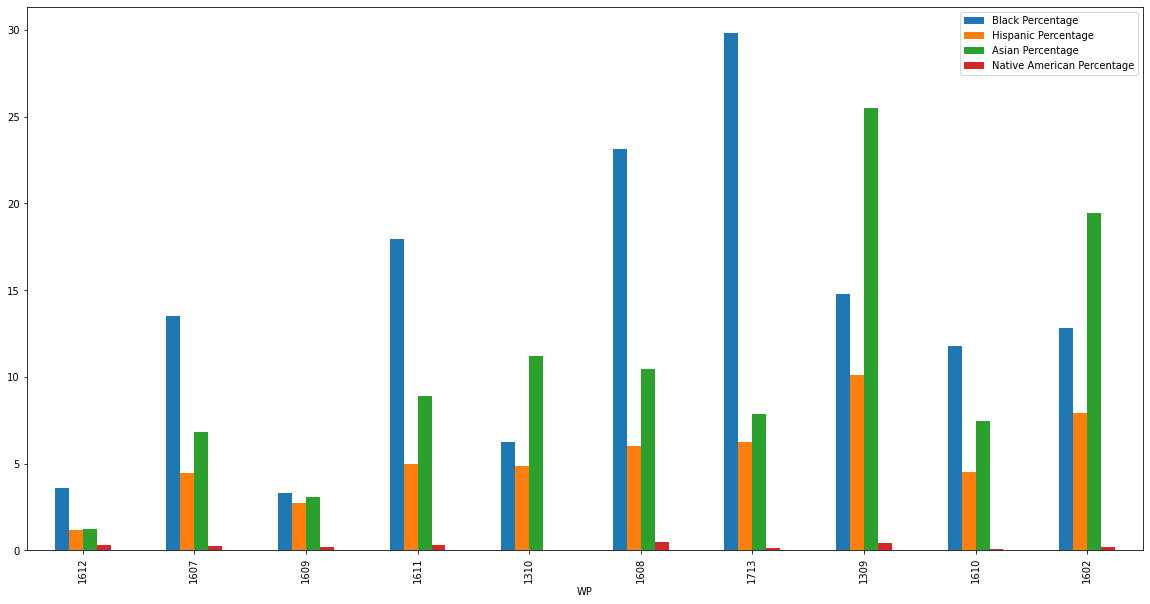

In [82]:
top10d3.plot(x="WP", y=["Black Percentage", "Hispanic Percentage", "Asian Percentage", "Native American Percentage"], kind="bar", figsize = (20,10))

### Now finding the precincts in District 3 with the top share in change of voter turnout

In [83]:
top_share_change_d3 = Dorcester_precincts(top_share_change)

In [86]:
top_share_change_d3[:10].drop(columns=['Diff11_13', 'Diff13_15', 'Diff15_17', 'Diff17_19', 'SumChange'])

,WP,Share of Voters 2011,Share of Voters 2013,Share of Voters 2015,Share of Voters 2017,Share of Voters 2019,AvgChange
0,1612,1.20712,0.64750,0.96486,0.64263,0.72872,0.29980
1,1714,0.42305,0.33577,0.76557,0.44468,0.45974,0.20949
2,1704,0.66479,0.58388,0.95499,0.58646,0.51404,0.20514
3,1310,1.11010,0.69274,0.89580,0.70799,0.70979,0.20206
4,1609,1.10533,0.67860,0.82871,0.61685,0.60071,0.19717
5,1709,0.37216,0.31456,0.58602,0.31763,0.38304,0.14936
6,1703,0.44372,0.45947,0.75965,0.49532,0.48365,0.14507
7,1608,0.81747,0.54430,0.65705,0.54872,0.59821,0.12356
8,1706,0.32921,0.33294,0.58602,0.35354,0.31878,0.12232
9,1607,0.79202,0.53581,0.59391,0.51189,0.50407,0.09908


<AxesSubplot:xlabel='WP'>

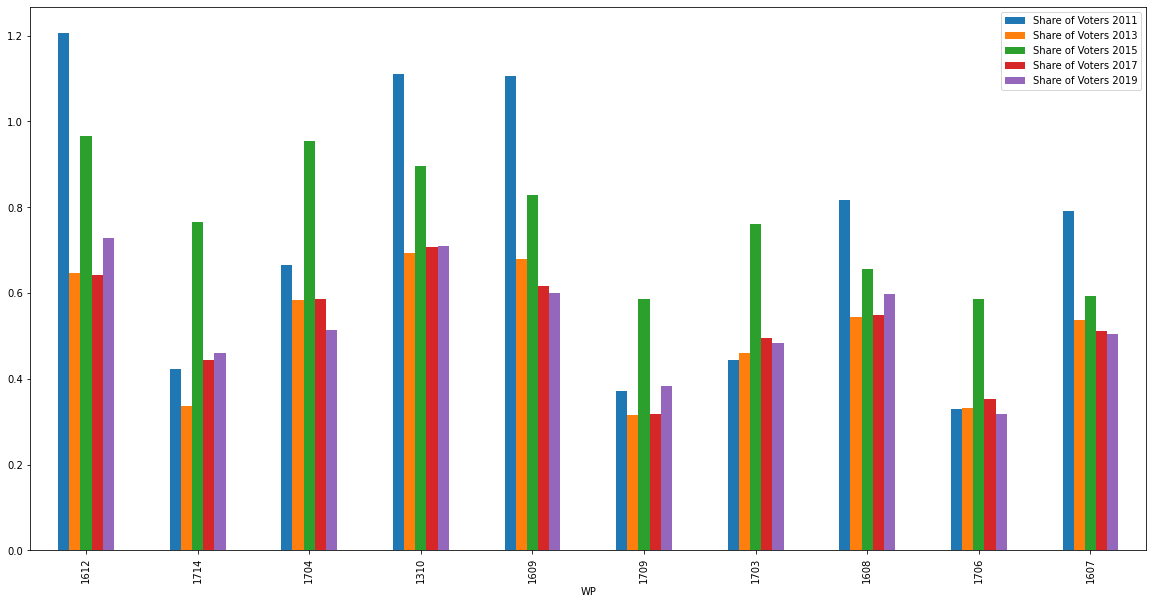

In [88]:
#visualizing these top 10
top_share_change_d3[:10].plot(x="WP", y=["Share of Voters 2011", "Share of Voters 2013", "Share of Voters 2015", "Share of Voters 2017", "Share of Voters 2019"], kind="bar", figsize = (20,10))

In [89]:
sharetop10d3 = cc2011.iloc[[154, 168, 158, 119, 151, 163, 157, 150, 160, 149]]

<AxesSubplot:xlabel='WP'>

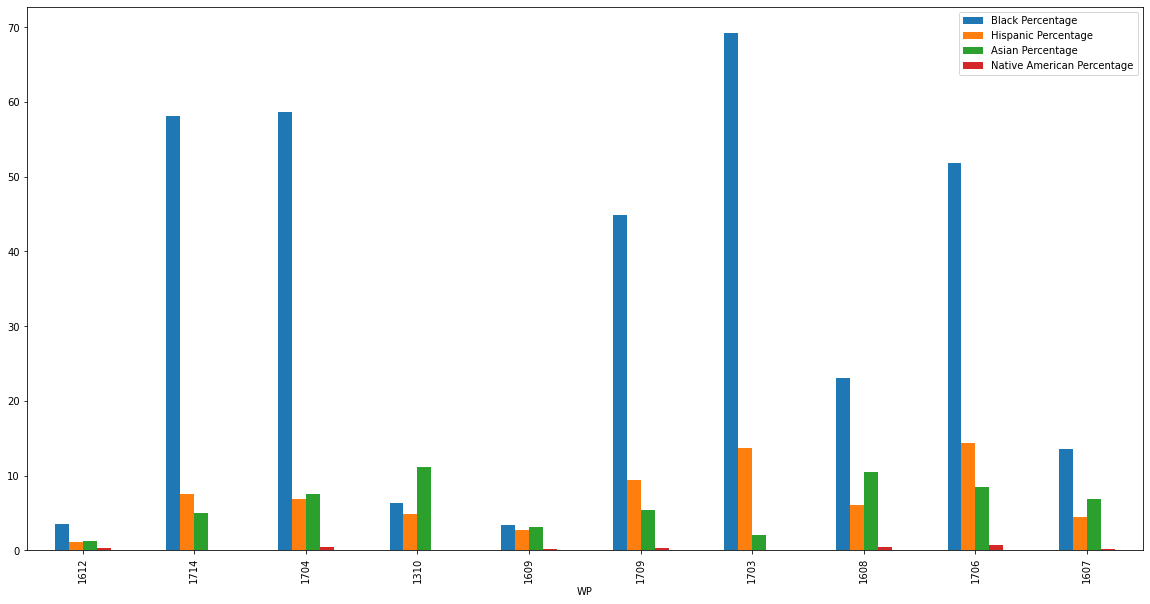

In [91]:
sharetop10d3.plot(x="WP", y=["Black Percentage", "Hispanic Percentage", "Asian Percentage", "Native American Percentage"], kind="bar", figsize = (20,10))